<a href="https://colab.research.google.com/github/nurdankar/KaggleExample/blob/main/Pima_Indians_Diabetes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pima Indians Onset of Diabetes Dataset

Bu veri seti, Pima kızılderilileri için hasta kayıtlarını ve son beş yılda hastalarda diyabet başlangıcı olup olmadığını tanımlamaktadır. Burada ikili sınıflandırma(binary classification) problemi söz konusudur. Yani diyabet başlangıcı ise 1, değil ise 0 şeklinde sınıflandırma yapılmaktadır. Hastaları tanımlayan giriş değerlerinin tamamı sayısaldır. Bu ise sayısal girdi ve çıktı değerleri bekleyen sinir ağları ile çalışmayı kolaylaştıran bir faktördür. 

## Kimlik Doğrulama

İlk olarak Google Colab'da çalışabilmek için gerekli işlemleri yapalım.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


## Dosya Kontrolü

In [ ]:
import os
os.chdir('/gdrive/My Drive/Calısma_Ortamı/Kaggle/')
!ls

Pima-Indians-Diabetes-Dataset.ipynb


## Kaggle'dan Colab'a Veriseti Import Etme

In [ ]:
!pip install kaggle

### Kaggle Hesabından Gerekli Dosyaların Yüklenmesi
İlk olarak bir Kaggle hesabı ediniyoruz ve

> Kaggle > My Account > Create New API Token

adımlarını takip ettikten sonra bilgisayarımıza inen `kaggle.json` dosyasını aşağıdaki hücrenin çalışmasının ardından `Dosyaları Seç` butonuna tıklayarak Colab'a yüklüyoruz.

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nurdankar","key":"20e18d978d8680d522c0f44ee35b058e"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
#change the permission
!chmod 600 ~/.kaggle/kaggle.json

### Veri Setini Kaggle'dan Colab'a Yükleme
Kaggle'da, kullanacak olduğumuz veri setinin sayfası olan

> https://www.kaggle.com/lianglirong/pima-indians-onset-of-diabetes

linkine giderek, New Notebook yazısının yanındaki üç noktadan `Copy API Command` dedikten sonra aşağıdaki hücreye yapıştırıyoruz ve hücreyi çalıştırınca veri setini indirmiş oluyoruz.



In [ ]:
!kaggle datasets download -d lianglirong/pima-indians-onset-of-diabetes

  0% 0.00/8.77k [00:00<?, ?B/s]
100% 8.77k/8.77k [00:00<00:00, 1.24MB/s]


Aşağıdaki gibi dosya kontrolü yaptığımızda veri setinin zip dosyası formunda indiğini göreceğiz. Ancak `csv` formatında olmasını istiyoruz.

In [ ]:
!ls

kaggle.json			     pima-indians-onset-of-diabetes.zip
Pima-Indians-Diabetes-Dataset.ipynb


Aşağıdaki hücrede yer alan komut ile zip dosyasını csv formatına dönüştürüyoruz.

In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  pima-indians-onset-of-diabetes.zip
  inflating: pima_data.csv           


Tekrar dosya kontrolü yaptığımızda ise veri setinin artık csv uzantılı olduğunu görebiliriz.

In [ ]:
!ls

kaggle.json  pima_data.csv  Pima-Indians-Diabetes-Dataset.ipynb


## Gerekli Kütüphanelerin Import Edilmesi

In [ ]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

## Veri Setinin Yüklenmesi

İlk olarak veriseti ve çalışılan notebook'un aynı dosya içinde olduğuna dikkat edilmelidir.


Veri setinin özellikleri: Sekiz giriş değişkeni ve bir çıkış değişkeni(son sütun) vardır. Burada sekiz giriş değişkenini bir çıkış değişkenine eşleyen bir modeli göreceğiz öyle ki bu durumu giriş değişkeni `X` ve çıkış değişkeni `y` olmak üzere `y=f(X)` olarak ifade edeceğiz.

Giriş değişkenlerini (X) aşağıdaki gibi ifade edebiliriz:


1. Hamile kalma sayısı
2. Oral glikoz tolerans testinde 2 saatlik plazma glikoz konsantrasyonu
3. Diyastolik kan basıncı (mm Hg)
4. Triceps deri kıvrım kalınlığı (mm)
5. 2 saatlik serum insülini (mu U/ml)
6. Vücut kitle indeksi (kg cinsinden ağırlık / (m cinsinden yükseklik) ^ 2)
7. Diyabet soyağacı işlevi(aile geçmişine göre diyabet olasılığını puanlayan bir işlev)
8. Yaş

Çıkış değişkeni (y): 

1. Sınıf değişkeni (0 ya da 1)

Şimdi veri setini yükleyebiliriz.














In [ ]:
dataset = loadtxt('pima_data.csv', delimiter=',')

X = dataset[:,0:8]
y = dataset[:,8]

## Modelin Oluşturulması

Bu adımda uygun gördüğümüz kadar katman ekleyerek bir `Sequential model` inşa ediyor olacağız. Kaç katman ekleneceği konusu sezgisel olmakla birlikte çoğunlukla deneme yanılma yoluyla en iyi ağ yapısı elde edilir. Biz bu örnekte üç katmanlı bir ağ yapısı kullanacağız. Giriş değişkeni sekiz olduğu için `input_dim = 8` ile bunu ayarlıyoruz. Farklı aktivasyon fonksiyonları seçilebileceği gibi daha iyi sonuçlar verdiği bilindiği için giriş katmanı ve ara katmanda `ReLU` fonksiyonunu kullanacağız. Ayrıca daha iyi sınıflandırma yapılabilmesi adına çıktı katmanında `Sigmoid` fonksiyonu kullanıyor olacağız.

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## Modelin Derlenmesi

Modelin derlenmesi, TensorFlow(veya farklı bir kütüphane) gerisinde sayısal kütüphanelerin kullanılmasını gerektirir. Burada ikili sınıflandırma problemi söz konusu olduğu için en uygun yitim(loss) argümanı olarak `binary_crossentropy` kullanacağız. Eniyileyici(optimizer) olarak ise farklı birçok algoritma kullanılabileceği gibi biz bu örnekte `Adam` algoritmasını tercih edeceğiz. Son olarak, sınıflandırma doğruluğunu kontrol etmek için metrik argümanını `accuracy` olarak alacağız.

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Modelin Eğitilmesi

Bu aşamada `fit()` fonksiyonunu kullanarak yüklemiş olduğumuz verilere göre  modeli eğiteceğiz(veya uyduracağız). Veri seti, `validation_split=0.3` argümanı ile eğitim seti ve test seti olmak üzere iki gruba ayrılır. Bu modelde ise toplam verinin %70'i eğitim, %30'u ise test setidir. Epok(epoch) argümanı, her bir epok için tüm veri kümesinin, sinir ağında sadece epok sayısı kadar ileri ve geri tekrarının yapılması şeklinde açıklanabilir. Bu problemde epok sayısını 110 olarak alacağız. Derin öğrenme modelleri tüm verileri bir kerede kullanmak yerine küçük yığınlara(batch) ayırır. Burada yığın büyüklüğünü `batch_size=12` olarak alacağız.  Ayrıca modelin eğitim sırasını ezberlemesinin önüne geçmek adına `shuffle=True` fonksiyonunu kullanacağız. Son olarak, verbose fonksiyonunun 0, 1, 2 değerlerini alabildiği bilgisini de göz önünde bulundurarak sonuçların bar biçiminde görselleştirilmesini istediğimiz için `verbose=1` olarak alacağız.

> NOT: Colab'ın kendi dinamiğinden kaynaklı olarak modelin eğitilmesi aşamasında her epoktaki adım sayısı, toplam veri sayısı değil toplam yığın sayısı şeklinde gösterilebilmektedir. Daha açık olarak, validation_split argümanının dahil edilmemesi durumunda `yığın sayısı=veri sayısı/yığın büyüklüğü` eşitliği kullanılmaktadır diyebiliriz. Bu örnek için `768/12 = 64` olacaktır. Bu durum modelin eğitim süresi, doğruluk veya yitim değerleri gibi herhangi bir değerini etkilememektedir. Ancak burada validation_split=0.3 alındığı için (768*(70/100))/12=44,8 yani toplam verinin eğitim seti üzerinden elde edilen yığın sayısı, her epokta 45 adım olacak şekilde gösterilecektir.



In [ ]:
history = model.fit(X, y, validation_split=0.3, epochs=110, batch_size=12, shuffle=True, verbose=1)

Epoch 1/110
45/45 [==============================] - 0s 6ms/step - loss: 21.2823 - accuracy: 0.3520 - val_loss: 13.6275 - val_accuracy: 0.3420
Epoch 2/110
45/45 [==============================] - 0s 3ms/step - loss: 9.4527 - accuracy: 0.3557 - val_loss: 5.7871 - val_accuracy: 0.3766
Epoch 3/110
45/45 [==============================] - 0s 3ms/step - loss: 3.9592 - accuracy: 0.4898 - val_loss: 2.1139 - val_accuracy: 0.4892
Epoch 4/110
45/45 [==============================] - 0s 3ms/step - loss: 1.6546 - accuracy: 0.5810 - val_loss: 0.9112 - val_accuracy: 0.6061
Epoch 5/110
45/45 [==============================] - 0s 3ms/step - loss: 1.1028 - accuracy: 0.6387 - val_loss: 0.7743 - val_accuracy: 0.6190
Epoch 6/110
45/45 [==============================] - 0s 3ms/step - loss: 0.9532 - accuracy: 0.6425 - val_loss: 0.7699 - val_accuracy: 0.5671
Epoch 7/110
45/45 [==============================] - 0s 4ms/step - loss: 0.8588 - accuracy: 0.6443 - val_loss: 0.7599 - val_accuracy: 0.5801
Epoch 8/110

## Modelin Değerlendirilmesi

Bu adımda, yüklediğimiz veri seti üzerinde eğittiğimiz ağın yitim değerini ve doğruluğunu daha ayrıntılı olarak değerlendirebiliriz. Böylece problemi ne derece iyi modellediğimizi gözlemleyebiliriz.

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Yitim değerlerini ve doğruluğu ayrıca görmek istersek aşağıda olduğu gibi kontrolünü yapabiliriz.


In [ ]:
print('Accuracy:', accuracy)

Accuracy: [0.3519552946090698, 0.3556796908378601, 0.4897579252719879, 0.5810055732727051, 0.6387336850166321, 0.6424580812454224, 0.6443203091621399, 0.6424580812454224, 0.6461824774742126, 0.6461824774742126, 0.6554934978485107, 0.6536312699317932, 0.6517691016197205, 0.6554934978485107, 0.6629422903060913, 0.6685288548469543, 0.6778398752212524, 0.6797020435333252, 0.6722532510757446, 0.6759776473045349, 0.6834264397621155, 0.6797020435333252, 0.6964617967605591, 0.690875232219696, 0.6759776473045349, 0.6964617967605591, 0.6927374005317688, 0.6964617967605591, 0.6815642714500427, 0.6871508359909058, 0.6945996284484863, 0.6964617967605591, 0.7076349854469299, 0.7001861929893494, 0.7076349854469299, 0.7001861929893494, 0.7076349854469299, 0.7076349854469299, 0.7113593816757202, 0.7039105892181396, 0.7206704020500183, 0.7094972133636475, 0.7039105892181396, 0.7076349854469299, 0.7206704020500183, 0.7299813628196716, 0.7132216095924377, 0.7094972133636475, 0.7150837779045105, 0.72439479

In [ ]:
print('Loss:', loss)

Loss: [21.282325744628906, 9.45272445678711, 3.959181308746338, 1.6546283960342407, 1.1028203964233398, 0.9531843066215515, 0.8588233590126038, 0.7852705121040344, 0.7432208061218262, 0.7174473404884338, 0.6963415145874023, 0.6828194260597229, 0.6728716492652893, 0.6591395735740662, 0.665921151638031, 0.643497109413147, 0.6338650584220886, 0.6384238004684448, 0.6325036287307739, 0.6215223073959351, 0.6193857192993164, 0.6269115805625916, 0.6171409487724304, 0.6185703873634338, 0.6147781610488892, 0.6082769632339478, 0.6085954904556274, 0.6004081964492798, 0.6205808520317078, 0.6078417897224426, 0.5993193984031677, 0.6043081879615784, 0.5928736925125122, 0.5919647812843323, 0.5923482179641724, 0.5978066921234131, 0.5980029702186584, 0.5978261828422546, 0.5935074687004089, 0.5905194282531738, 0.5892503261566162, 0.5878486037254333, 0.5912474393844604, 0.5913225412368774, 0.5820910334587097, 0.5824876427650452, 0.58648282289505, 0.5787361264228821, 0.5814597606658936, 0.5782227516174316, 

In [ ]:
print('val_accuracy', val_accuracy)

val_accuracy [0.3419913351535797, 0.37662336230278015, 0.48917749524116516, 0.6060606241226196, 0.6190476417541504, 0.5670995712280273, 0.5800865888595581, 0.5974025726318359, 0.6406926512718201, 0.6147186160087585, 0.6060606241226196, 0.6017315983772278, 0.6103895902633667, 0.6363636255264282, 0.6017315983772278, 0.6233766078948975, 0.6320346593856812, 0.5974025726318359, 0.6103895902633667, 0.6277056336402893, 0.5800865888595581, 0.6406926512718201, 0.6103895902633667, 0.6147186160087585, 0.5930736064910889, 0.6060606241226196, 0.6190476417541504, 0.5844155550003052, 0.5714285969734192, 0.6017315983772278, 0.5714285969734192, 0.6017315983772278, 0.6233766078948975, 0.6190476417541504, 0.6363636255264282, 0.6363636255264282, 0.588744580745697, 0.5800865888595581, 0.6363636255264282, 0.5844155550003052, 0.6406926512718201, 0.5974025726318359, 0.5974025726318359, 0.6103895902633667, 0.6406926512718201, 0.6363636255264282, 0.6363636255264282, 0.5974025726318359, 0.649350643157959, 0.6277

In [ ]:
print('val_loss', val_loss)

val_loss [13.627470016479492, 5.787054538726807, 2.1138970851898193, 0.9111829400062561, 0.7743409872055054, 0.7699419260025024, 0.7598844170570374, 0.7542641758918762, 0.7391826510429382, 0.7255322337150574, 0.7231484651565552, 0.7183371782302856, 0.7177144885063171, 0.7019433975219727, 0.7123318910598755, 0.7072808742523193, 0.7135344743728638, 0.7129555940628052, 0.7035284042358398, 0.694974422454834, 0.7061458826065063, 0.687201738357544, 0.6877776980400085, 0.6860588788986206, 0.6807603240013123, 0.6819676160812378, 0.6783726811408997, 0.7025659680366516, 0.684969425201416, 0.6789838075637817, 0.6778717041015625, 0.6705982685089111, 0.6638129353523254, 0.6612435579299927, 0.6627024412155151, 0.6622664332389832, 0.6693877577781677, 0.6905973553657532, 0.6600258350372314, 0.6853697896003723, 0.656661868095398, 0.6683750748634338, 0.670207142829895, 0.6668248176574707, 0.6517438888549805, 0.6488344073295593, 0.6534981727600098, 0.66315758228302, 0.6473549604415894, 0.6548134684562683

## Model ile İlgili Tahminlerin Yapılması

Model ile ilgili tahminler `predict()` fonksiyonunu kullanılarak yapılabilmektedir.

In [ ]:
predictions = model.predict(X)

Veri setindeki ilk beş giriş değişkenini aşağıda inceleyelim.  Bu adımda ilk beş giriş değişkeninin girdi değerleri, tahmin edilen sınıf değerleri ve beklenilen sınıf değerleri(expected) yazdırılır. Böylece tahmin edilen değerler ile beklenilen değerlerin kıyaslaması yapılabilir. Bu kıyaslama aşamasında sağlanacak doğruluk değeri yukarıda elde ettiğimiz değeri destekleyecektir.

In [ ]:
for i in range(5):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 0 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 0 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 0 (expected 1)


## Keşif

Veri setindeki giriş değişkenlerinin sadece ilkini görmek istersek aşağıdaki gibi yazdırabiliriz. Benzer olarak diğer değişkenler de yazdırılabilir.

In [ ]:
X[0]

array([  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
        50.   ])

Giriş değişkenlerinin şeklini görmek istersek aşağıdaki hücrede olduğu gibi kontrolünü yapabiliriz. Elde edilen `(768, 8)`  formundaki çıktıyı, toplam 768 verinin herbirinin 8 değere sahip bir vektör olduğu şeklinde yorumlayabiliriz.

In [ ]:
img = X
print(img.shape)

(768, 8)


Bu adımda ise 768 veriden sadece bir tanesini ele alalım. Yukarıda belirtmiş olduğumuz gibi bu 768 veriden sadece bir tanesi olan `X[0]`, 8 değere sahip bir vektördür. Benzer olarak `X[1], X[2], ...` için de aynı yorum yapılabilir.

In [ ]:
img = X[0]
print(img.shape)

(8,)


Bir alt hücrede olduğu gibi tahmin değerlerinin şekli için elde edilen `(768,1)` formundaki çıktıyı, 768 tane olan her bir tahminin sadece 1 tane değere(0 veya 1) sahip olan bir vektör olduğu şeklinde yorumlayabiliriz.

In [ ]:
predictions.shape

(768, 1)

Veri tipini aşağıdaki gibi kontrol edebiliriz.

In [ ]:
print(X.dtype)

float64


## Modelin Görselleştirilmesi

Modelin başarım ve kayıp değerlerini aşağıdaki gibi görselleştirebilir, grafik üzerinden yorumlayabiliriz.

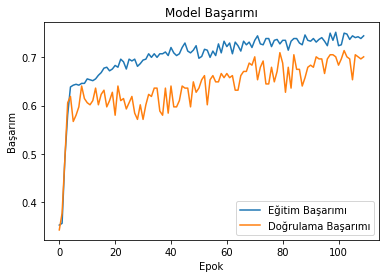

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Başarımı')
plt.ylabel('Başarım')
plt.xlabel('Epok')
plt.legend(['Eğitim Başarımı', 'Doğrulama Başarımı'], loc='lower right')
plt.show()

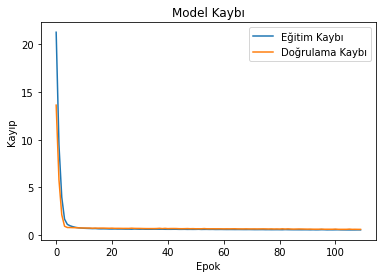

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Kaybı')
plt.ylabel('Kayıp')
plt.xlabel('Epok')
plt.legend(['Eğitim Kaybı', 'Doğrulama Kaybı'], loc='upper right')
plt.show()

## Referanslar

1. Machine Learning Mastery, Your First Deep Learning Project in Python with Keras Step-By-Step
2. François Chollet, Python ile Derin Öğrenme, 2019


